In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Wczytanie danych

In [2]:
train = pd.read_csv('data\\train.csv')
test = pd.read_csv('data\\test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 80 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

In [3]:
train.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


### Rozbicie daty na składowe

In [4]:
def change_date(dataframe):
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    dataframe['dayofweek'] = dataframe['date'].dt.dayofweek.astype('category')
    dataframe['month'] = dataframe['month'].astype('category')
    dataframe['hour'] = dataframe['hour'].astype('category')
    return dataframe


train, test = change_date(train), change_date(test)

### Wykres przedstawiający jakość powietrza w krajach afrykańskich

Text(0.5, 1.0, 'Jakość powietrza z podziałem na kraje')

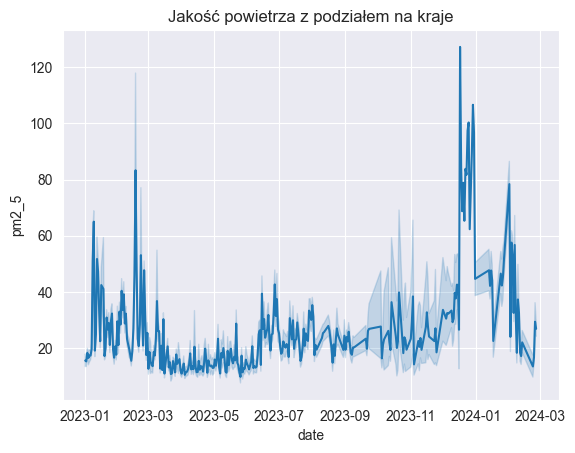

In [5]:
sns.lineplot(data=train, x='date', y='pm2_5')
plt.title('Jakość powietrza z podziałem na kraje')

### Wykres przedstawiający wartość pm2_5 w zarejestrowanych godzinach

Text(0.5, 1.0, 'Jakość powietrza w poszczególnych godzinach z podziałem na kraje')

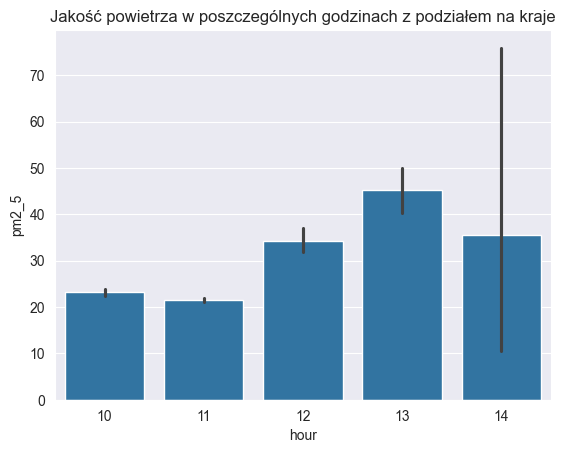

In [6]:
sns.barplot(data=train, x='hour', y='pm2_5')
plt.title('Jakość powietrza w poszczególnych godzinach z podziałem na kraje')

### Wykres przedstawiający wartość pm2_5 w zależności od dnia tygodnia

Text(0.5, 1.0, 'Jakość powietrza w każdym dniu tygodnia z podziałem na kraje')

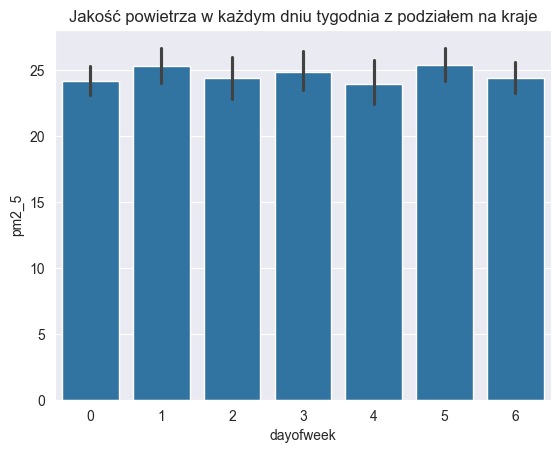

In [7]:
sns.barplot(data=train, x='dayofweek', y='pm2_5')
plt.title('Jakość powietrza w każdym dniu tygodnia z podziałem na kraje')

### Wykres przedstawiający wartość pm2_5 w zależności od miesiąca

Text(0.5, 1.0, 'Jakość powietrza w każdym dniu tygodnia z podziałem na kraje')

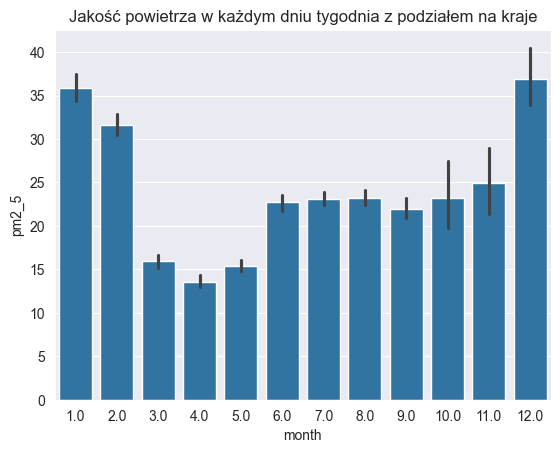

In [8]:
sns.barplot(data=train, x='month', y='pm2_5')
plt.title('Jakość powietrza w każdym dniu tygodnia z podziałem na kraje')

### Korelacja wybranych kolumn z pm2_5

<Axes: >

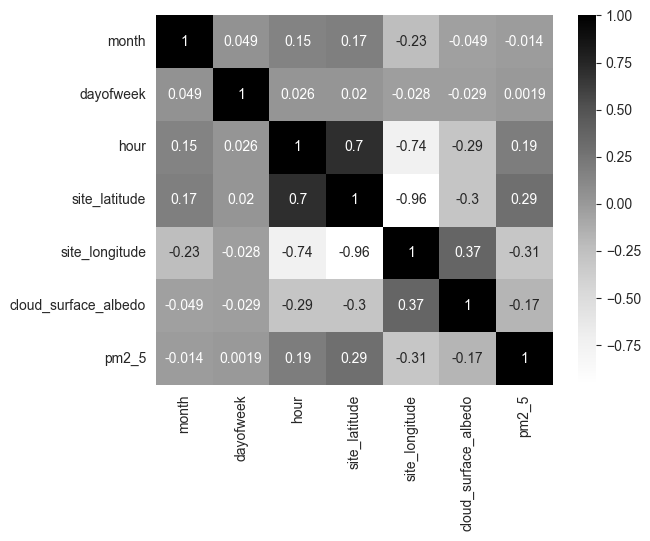

In [9]:
sns.heatmap(train[['month', 'dayofweek', 'hour', 'site_latitude', 'site_longitude', 'cloud_surface_albedo', 'pm2_5']].corr(), annot=True, cmap='Greys')

## <center>Czyszczenie danych</center>
### 1. Imputacja, usuwanie kolumn, oraz inne cuda

In [10]:
from sklearn.impute import KNNImputer


def fill_x(column_name='site_latitude'):
    column_values = train[column_name].unique()
    for date in column_values:
        for i, column in enumerate(starts_with):
            similar_columns = [col for col in train.columns if col.startswith(column)]
            df = train.loc[train[column_name] == date, similar_columns].copy()
            if not df.empty:
                try:
                    train.loc[train[column_name] == date, similar_columns] = imputers[i].fit_transform(df)
                except ValueError:
                    train.drop(index=df.index, inplace=True)
                    train.reset_index(drop=True, inplace=True)

def fill_test(column_name='site_latitude'):
    column_values = test[column_name].unique()
    for date in column_values:
        for i, column in enumerate(starts_with):
            similar_columns = [col for col in test.columns if col.startswith(column)]
            df = test.loc[test[column_name] == date, similar_columns].copy()
            if not df.empty:
                test.loc[test[column_name] == date, similar_columns] = imputers[i].transform(df)

def drop_high_nans(dataframe):  # usuwamy kolumny o dużej liczbie wartości NaN
    columns_nans = []
    for i, el in enumerate(dataframe.columns):
        if dataframe[el].isna().sum() / len(dataframe) >= 0.9:
            columns_nans.append(el)
    dataframe.drop(columns_nans, axis=1, inplace=True)
    return dataframe

def drop_high_correlated_columns():
    matrix = train.corr(numeric_only=True).abs()
    upper_t = matrix.where(np.triu(np.ones_like(matrix, dtype=np.bool_), k=1))
    return [col for col in upper_t.columns if any(upper_t[col] > 0.99)]

def drop_low_correlated_columns_to_pm2_5():
    corr = train.corr()['pm2_5'].to_frame()
    return corr[(corr['pm2_5'] < 0.01) & (corr['pm2_5'] > -0.01)].index.values

def subract_azimuth_zenith(dataframe):
    zenith_columns = [zenith for zenith in dataframe.columns if 'zenith' in zenith]
    azimuth_columns = [azimuth for azimuth in dataframe.columns if 'azimuth' in azimuth]
    for i, zenith in enumerate(zenith_columns):
        splitted = zenith.split('_')
        dataframe[f'{splitted[0]}_{splitted[1]}_diff'] = dataframe[zenith] - dataframe[azimuth_columns[i]]
        dataframe.drop(zenith_columns[i], axis=1, inplace=True)
        dataframe.drop(azimuth_columns[i], axis=1, inplace=True)
    return dataframe

def change_to_categorical():
    for column in categorical:
        train[column] = train[column].astype('category')
        test[column] = test[column].astype('category')


categorical = ['hour', 'month', 'dayofweek', 'site_latitude', 'site_longitude']
test_ids = test['id']
train.drop(columns=['id', 'city', 'country', 'date', 'site_id'], inplace=True)
test.drop(columns=['id', 'city', 'country', 'date', 'site_id'], inplace=True)
starts_with = train.columns.str.split('_', expand=True).levels[0].to_frame()
starts_with.drop(['month', 'hour', 'pm2', 'site'], inplace=True)
starts_with = starts_with[0].tolist()

imputers = [KNNImputer(n_neighbors=15, weights='distance') for _ in range(len(starts_with))]
train, test = drop_high_nans(train), drop_high_nans(test)
change_to_categorical()
# fill_x(), fill_test()
to_drop = drop_low_correlated_columns_to_pm2_5()
train, test = train.drop(columns=to_drop, axis=1), test.drop(columns=to_drop, axis=1)
# train, test = subract_azimuth_zenith(train), subract_azimuth_zenith(test)

### Wykresy pudełkowe wskazujące wartości odstające

In [11]:
from sympy import divisors


def plot_boxplots():
    for i, column_group in enumerate(starts_with):
        similar_columns = [col for col in train.columns if col.startswith(column_group)]
        if len(similar_columns) > 1:
            divs = divisors(len(similar_columns))
            if len(divs) % 2 == 0:
                rows, cols = divs[(len(divs) // 2) - 1], divs[len(divs) // 2]
            else:
                rows, cols = divs[len(divs) // 2], divs[len(divs) // 2]
            fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(40, 30), squeeze=False)
            fig.suptitle(column_group, fontsize=25)
            for j, column in enumerate(similar_columns):
                x_cord, y_cord = divmod(j, cols)
                train[column].plot(kind='box', ax=ax[x_cord, y_cord], fontsize=15)
            plt.show()


vertical_columns = [col for col in train.columns if 'number_density' in col]

# plot_boxplots()

### 2. Wskazanie kwantyli, od których są outliery

In [12]:
from scipy.stats import zscore

detect_outliers = zscore(train['pm2_5'])

quantiles = pd.DataFrame(list(zip(np.linspace(0.9, 1, 20), [np.quantile(detect_outliers, el) for el in np.linspace(0.9, 1, 20)])), columns=['quantile', 'zscore'])
quantiles

,quantile,zscore
0,0.900000,0.820787
1,0.905263,0.855094
2,0.910526,0.891583
3,0.915789,0.940661
4,0.921053,0.984633
5,0.926316,1.022564
6,0.931579,1.062251
7,0.936842,1.123006
8,0.942105,1.189943
9,0.947368,1.257510


### 3. Usunięcie wartości odstających

In [13]:
def del_pm2_5_outliers():
    indexes_to_drop = []
    q1, q2 = np.quantile(detect_outliers, 0.01), np.quantile(detect_outliers, 0.95)
    for i, el in enumerate(detect_outliers):
        if el > q2:
            indexes_to_drop.append(i)
    train.drop(indexes_to_drop, inplace=True)
    train.reset_index(drop=True, inplace=True)


del_pm2_5_outliers()

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667 entries, 0 to 7666
Data columns (total 60 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   site_latitude                                             7667 non-null   category
 1   site_longitude                                            7667 non-null   category
 2   hour                                                      7667 non-null   category
 3   sulphurdioxide_so2_column_number_density_amf              2967 non-null   float64 
 4   sulphurdioxide_so2_slant_column_number_density            2967 non-null   float64 
 5   sulphurdioxide_sensor_azimuth_angle                       2967 non-null   float64 
 6   sulphurdioxide_sensor_zenith_angle                        2967 non-null   float64 
 7   sulphurdioxide_solar_azimuth_angle                        2967 non-null   float64 
 8   sulphurd

In [14]:
train.head()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,6.53257,3.39936,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,6.53257,3.39936,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,6.53257,3.39936,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45185.49959,6791.682888,51171.802486,5791.682829,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,6.53257,3.39936,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,6.53257,3.39936,13,0.774656,0.000207,-97.811241,49.513344,-126.064468,40.167336,0.000083,...,86197.53125,1451.050659,96215.906250,451.050598,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


## <center>Selekcja cech</center>

In [15]:
from sklearn.feature_selection import RFECV, RFE, SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor


def plot_feature_importance(sc, num_of_features):
    if isinstance(sc, RFECV) or isinstance(sc, RFE):
        scores = dict(zip(sc.feature_names_in_, sc.ranking_))
    else:
        scores = dict(zip(sc.feature_names_in_, sc.scores_))
    scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:num_of_features]
    scores_df = pd.DataFrame(scores, columns=['Feature', 'Score'])

    scores_df.plot(kind='bar', x='Feature', y='Score', figsize=(10, 6), rot=90, title='Oceny wybranych cech')
    plt.xlabel('Cecha')
    plt.ylabel('Ocena')


# selector = RFE(
#     estimator=RandomForestRegressor(
#         n_estimators=700, 
#         max_depth=7, 
#         random_state=4, 
#         n_jobs=-1, 
#         oob_score=True,
#         warm_start=True
#     ),
#     n_features_to_select=k,
# )
# k = 17
# selector = RFECV(
#     estimator=RandomForestRegressor(
#         n_estimators=400, 
#         max_depth=10, 
#         random_state=4, 
#         n_jobs=-1, 
#         oob_score=True, 
#         warm_start=True, 
#         ccp_alpha=1e-4
#     ),
#     min_features_to_select=k, 
#     cv=10, 
#     scoring='neg_root_mean_squared_error',
#     n_jobs=-1
# )
# selector.fit(train, y)
# train, test = selector.transform(train), selector.transform(test)
# 
# plot_feature_importance(selector, k)

## <center>Transformacja danych</center>
### 1. Standaryzacja danych

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

# Bez kategorycznych
# scale_columns = train.columns.difference(categorical)
# 
# scaler = make_column_transformer((StandardScaler(), scale_columns))
# 
# X_cat, test_cat = train[categorical], test[categorical]
# 
# train = pd.concat([pd.DataFrame(scaler.fit_transform(train[scale_columns]), columns=scaler.feature_names_in_), X_cat], axis=1)
# test = pd.concat([pd.DataFrame(scaler.transform(test[scale_columns]), columns=scaler.feature_names_in_), test_cat], axis=1)
# Wszystkie kolumny
scaler = StandardScaler()

train['pm2_5'] = train['pm2_5'].apply(lambda x: np.round(x, 3))
train_pm2_5 = train['pm2_5']
train, test = scaler.fit_transform(train.drop(columns='pm2_5', axis=1)), scaler.transform(test)
train, test = pd.concat([pd.DataFrame(train, columns=scaler.feature_names_in_), train_pm2_5], axis=1), pd.concat([test_ids, pd.DataFrame(test, columns=scaler.feature_names_in_)], axis=1)

### Zapis przekształconych danych

In [17]:
import os


if 'transform' not in os.listdir(os.getcwd()):
    os.mkdir('transform')
train.to_csv('transform\\train.csv', index=False)
test.to_csv('transform\\test.csv', index=False)